In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt             #visualisation
from matplotlib.dates import DateFormatter
%matplotlib inline


In [ ]:
data = pd.read_csv('Index-HDB-Private-SP500.csv')
data['Date'] = pd.to_datetime(data['Date'])
#print(f"data['Date'] {data['Date']}")
hdb_key_all = 'HDB Resale (All)'
hdb_key_5 = 'HDB Resale (5-room)'
hdb_key_exec = 'HDB Resale (Executive)'
condo_key_all = 'Condo-Resale (All)'
condo_key_ccr = 'Condo-Resale (Core Central)'
condo_key_roc = 'Condo-Resale (Rest of Central)'
condo_key_oc = 'Condo-Resale (Outside Central)'
snp_key = 'S&P 500'

data.sort_values(by='Date', ascending=True, inplace=True)

def cleanup_data(column_key):
  data[column_key] = data[column_key].str.replace(',', '')
  data[column_key] = pd.to_numeric(data[column_key], errors='coerce')

cleanup_data(snp_key)

# Plot the graph of un-normalized data
# plt.figure(figsize=(10, 6))
# #print(f"data['snp'] {data[snp_key]}")
# plt.plot(data['Date'], data[snp_key], label='S&P 500')
# plt.plot(data['Date'], data[hdb_key_all], label='Singapore HDB Resale Flats (All)')

# plt.title('First Draft')
# plt.xlabel('Date')
# plt.ylabel('Absolute Value')
# plt.legend()
# plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))  # Format date display
# plt.xticks(rotation=45)  # Rotate dates for better readability
# plt.show()


In [ ]:

# Plot the graph of NORMALIZED data
list_of_graph_keys = [snp_key, hdb_key_all, hdb_key_5, condo_key_all, condo_key_ccr, condo_key_roc, condo_key_oc]


# Function to normalize the data based on a start date
def normalize_data(df, start_date):
    if start_date not in df['Date'].values:
        print(f"Start date {start_date} not found in data. Please choose a valid date.")
        return df

    normalized_df = data.copy()

    for key in list_of_graph_keys:
      start_value = df[df['Date'] == start_date][key].iloc[0]
      normalized_df[key] = df[key] / start_value
    return normalized_df


# Normalize data

def plot_normalized_data_from_baseline(input_date):
  start_date = pd.to_datetime(input_date)

  normalized_df = normalize_data(data, start_date)

  plt.figure(figsize=(10, 6))
  for key in list_of_graph_keys:
    plt.plot(data['Date'], normalized_df[key], label=key)
  # plt.plot(data['Date'], data[hdb_key_all], label='Singapore HDB Resale Flats (All)')

  plt.title(f"Comparative Performance of Asset Classes From Baseline of {input_date}")
  plt.xlabel('Date')
  plt.ylabel('Normalized Index Value')
  plt.legend(loc='lower left')
  plt.xlim(left=start_date)
  plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))  # Format date display
  plt.xticks(rotation=45)  # Rotate dates for better readability
  plt.show()




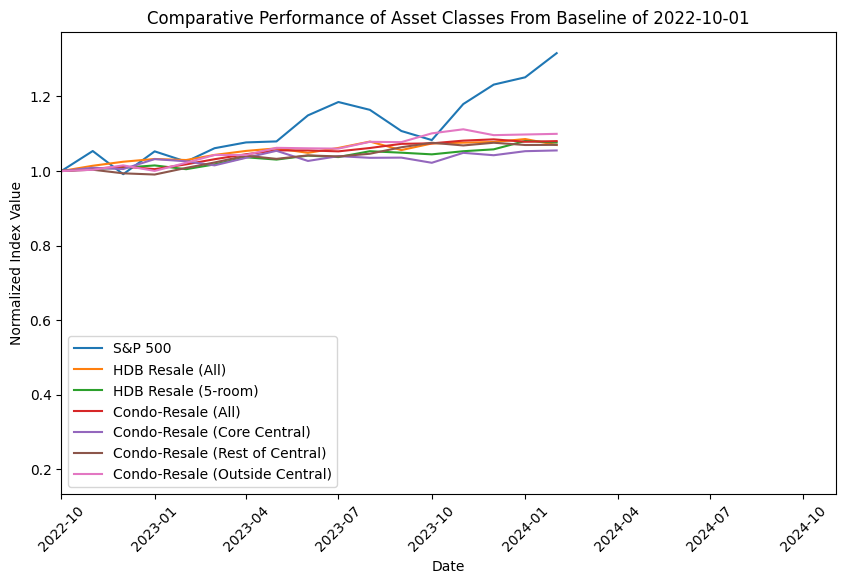

In [ ]:
plot_normalized_data_from_baseline('2022-10-01')